<a href="https://colab.research.google.com/github/AnmolGoklani/ML_Lab/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Import the necessary libraries and load the titanic dataset from the
# seaborn library into a pandas DataFrame.
import pandas as pd
import seaborn as sb

In [44]:
# Display the first 5 rows of the dataset.
df = sb.load_dataset('titanic')
dl = df.values.tolist()
# print(df.head())
print("The first five rows:")
for row in dl[:5]:
  for column in row:
    print(column , end = "  ")
  print("")

# for i in range(5):
#   for column in df:
#     print(column[i], end = "  ")
#   print("")

The first five rows:
0  3  male  22.0  1  0  7.25  S  Third  man  True  nan  Southampton  no  False  
1  1  female  38.0  1  0  71.2833  C  First  woman  False  C  Cherbourg  yes  False  
1  3  female  26.0  0  0  7.925  S  Third  woman  False  nan  Southampton  yes  True  
1  1  female  35.0  1  0  53.1  S  First  woman  False  C  Southampton  yes  False  
0  3  male  35.0  0  0  8.05  S  Third  man  True  nan  Southampton  no  True  


In [45]:
#Print the column headers of the dataset.
print("Columns:" , end = " ")
print(df.columns.tolist())

Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [46]:
#Change the column headers to uppercase.
df.columns = df.columns.str.upper()
print(df.columns.tolist())

['SURVIVED', 'PCLASS', 'SEX', 'AGE', 'SIBSP', 'PARCH', 'FARE', 'EMBARKED', 'CLASS', 'WHO', 'ADULT_MALE', 'DECK', 'EMBARK_TOWN', 'ALIVE', 'ALONE']


In [47]:
# Calculate and display the descriptive statistics of the dataset.
import math

#mean
def calc_mean(data):
  return sum(data) / len(data)

#standard deviation
def calc_std(data):
  mean = calc_mean(data)
  variance = sum((x - mean) ** 2 for x in data)
  return math.sqrt(variance / (len(data) - 1))

#median
def calc_median(data):
  sdata = sorted(data)
  n = len(sdata)
  if n % 2 == 0:
    return (sdata[n//2 - 1] + sdata[n//2]) / 2
  else:
    return sdata[n//2]

#quartiles
def calc_quartiles(data):
  sdata = sorted(data)
  n = len(sdata)

  #25th percentile
  per1 = sdata[n // 4]

  #75th percentile
  per2 = sdata[3 * n // 4]

  return per1,per2

#count unique values
def cu(data):
  return len(set(data))

numeric_columns = ['AGE', 'FARE', 'SURVIVED' , 'PCLASS' , 'SIBSP' , 'PARCH']

for column in numeric_columns:
  data = [x for x in df[column.upper()] if not pd.isna(x)]  # Remove NaN values

  mean = calc_mean(data)
  std = calc_std(data)
  min_val = min(data)
  max_val = max(data)
  median = calc_median(data)
  per1, per2 = calc_quartiles(data)
  unique_count = cu(data)

  print(f"\nDescriptive statistics for {column}:")
  print(f"Mean: {mean:.2f}")
  print(f"Standard Deviation: {std:.3f}")
  print(f"Minimum: {min_val:.2f}")
  print(f"25th Percentile: {per1:.2f}")
  print(f"Median (50th Percentile): {median:.2f}")
  print(f"75th Percentile: {per2:.2f}")
  print(f"Maximum: {max_val:.2f}")
  print(f"Number of unique values: {unique_count}")


Descriptive statistics for AGE:
Mean: 29.70
Standard Deviation: 14.526
Minimum: 0.42
25th Percentile: 20.00
Median (50th Percentile): 28.00
75th Percentile: 38.00
Maximum: 80.00
Number of unique values: 88

Descriptive statistics for FARE:
Mean: 32.20
Standard Deviation: 49.693
Minimum: 0.00
25th Percentile: 7.90
Median (50th Percentile): 14.45
75th Percentile: 31.00
Maximum: 512.33
Number of unique values: 248

Descriptive statistics for SURVIVED:
Mean: 0.38
Standard Deviation: 0.487
Minimum: 0.00
25th Percentile: 0.00
Median (50th Percentile): 0.00
75th Percentile: 1.00
Maximum: 1.00
Number of unique values: 2

Descriptive statistics for PCLASS:
Mean: 2.31
Standard Deviation: 0.836
Minimum: 1.00
25th Percentile: 2.00
Median (50th Percentile): 3.00
75th Percentile: 3.00
Maximum: 3.00
Number of unique values: 3

Descriptive statistics for SIBSP:
Mean: 0.52
Standard Deviation: 1.103
Minimum: 0.00
25th Percentile: 0.00
Median (50th Percentile): 0.00
75th Percentile: 1.00
Maximum: 8.00
N

In [48]:
#Check for missing values in the dataset and print the total number of missing values for each column.
def func(data):
    return sum(1 for x in data if pd.isna(x))

print("Missing values in each column:")
for column in df.columns:
    count = func(df[column])
    print(f"{column}: {count}")

Missing values in each column:
SURVIVED: 0
PCLASS: 0
SEX: 0
AGE: 177
SIBSP: 0
PARCH: 0
FARE: 0
EMBARKED: 2
CLASS: 0
WHO: 0
ADULT_MALE: 0
DECK: 688
EMBARK_TOWN: 2
ALIVE: 0
ALONE: 0


In [83]:
#Fill the missing values in the AGE column with the median age
age_values = [x for x in df['AGE'] if not pd.isna(x)]
median_age = calc_median(age_values)

# for i in range(len(df)):
#     if pd.isna(df['AGE'][i]):
#         df['AGE'][i] = median_age


df.loc[df['AGE'].isna(), 'AGE'] = median_age

print(f"\nMedian age used to fill missing values: {median_age:.2f}")

print(f"Number of missing values in AGE column after filling: {func('AGE'): .2f}")


Median age used to fill missing values: 28.00
Number of missing values in AGE column after filling:  0.00


In [50]:
#Find the average age of the passengers.
data = [x for x in df['AGE'] if not pd.isna(x)]
avg = calc_mean(data)
print(f"\nAverage age of passengers: {avg:.2f}")


Average age of passengers: 29.36


In [51]:
#Find the number of passengers who survived and those who did not
survivors = sum(1 for x in df['SURVIVED'] if x == 1)
non_survivors = sum(1 for x in df['SURVIVED'] if x == 0)

print("\nSurvival statistics:")
print(f"Number of survivors: {survivors}")
print(f"Number of non-survivors: {non_survivors}")


Survival statistics:
Number of survivors: 342
Number of non-survivors: 549


In [52]:
#Calculate the survival rate
total = len(df)
rate = (survivors / total) * 100

print(f"\nSurvival rate: {rate:.2f}%")


Survival rate: 38.38%


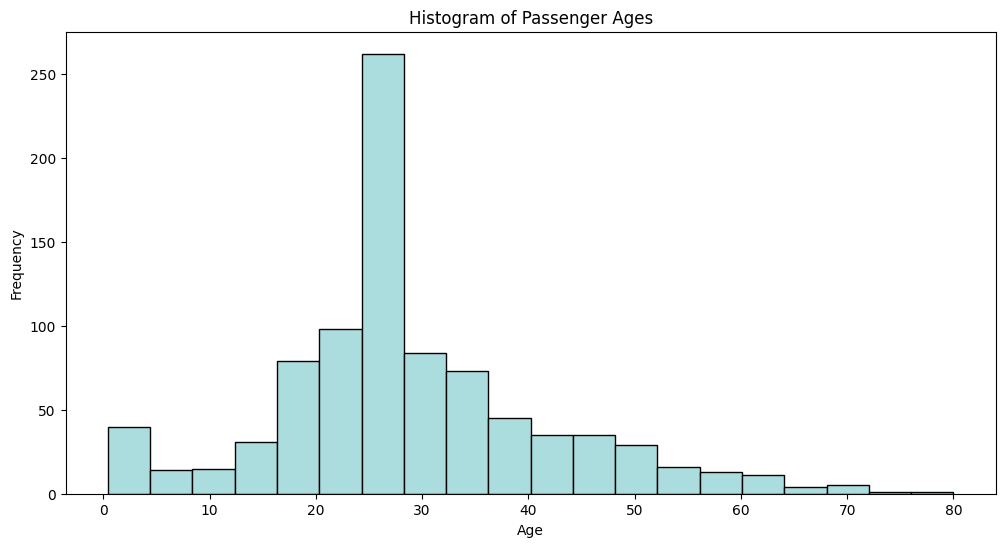

In [74]:
import matplotlib.pyplot as plot

#Plot a histogram of the ages of the passengers
plot.figure(figsize=(12, 6))
plot.hist(df['AGE'], bins=20, edgecolor='black', color='#ACDDDE')
plot.title('Histogram of Passenger Ages')
plot.xlabel('Age')
plot.ylabel('Frequency')
plot.show()

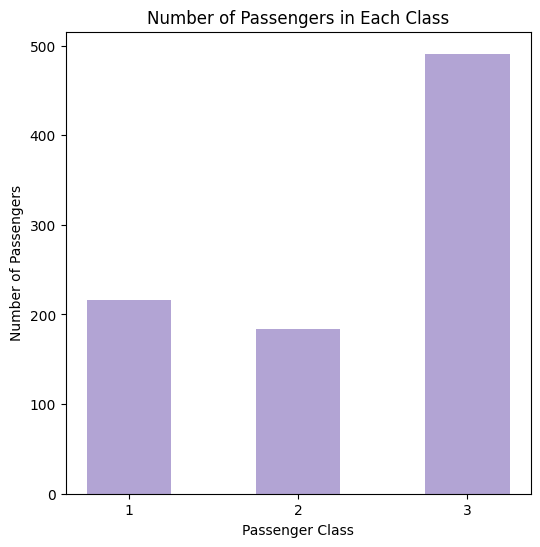

In [81]:
#Create a bar plot showing the number of passengers in each class
cl_count = df['PCLASS'].value_counts().sort_index()

plot.figure(figsize=(6, 6))
plot.bar(cl_count.index, cl_count.values, color = '#b2a4d4' , width=0.5)
plot.title('Number of Passengers in Each Class')
plot.xlabel('Passenger Class')
plot.ylabel('Number of Passengers')
plot.xticks([1, 2, 3])
plot.show()

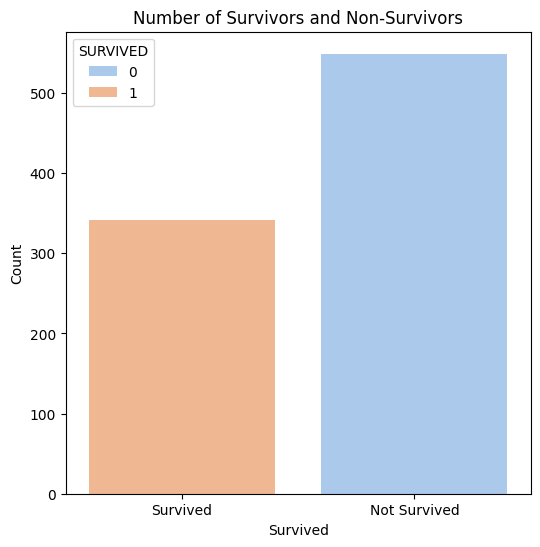

In [79]:
#Create a count plot showing the number of survivors and non-survivors
plot.figure(figsize=(6, 6))
sb.countplot(x='SURVIVED', data=df , order=[1,0], palette = 'pastel' , hue = 'SURVIVED')
plot.title('Number of Survivors and Non-Survivors')
plot.xlabel('Survived')
plot.ylabel('Count')
plot.xticks([0, 1], ['Survived', 'Not Survived'])
plot.show()